In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [37]:
df = pd.read_csv("Davos_combined_cleaned.csv")
print("Daten erfolgreich geladen.")

Daten erfolgreich geladen.


# CATEGORIZE DISTANCE

In [38]:
# Define bins and labels for distance categorization (in meters)
bins = [0, 300, 700, 1500, df['distance_skilift_meters'].max() + 1]
labels = ['< 300m (Very Close)', '300m - 700m (Close)', '700m - 1500m (Medium)', '> 1500m (Far)']

# Create the new categorical column
df['distance_category'] = pd.cut(
    df['distance_skilift_meters'],
    bins=bins,
    labels=labels,
    right=False,  # Intervals are [lower, upper)
    include_lowest=True
)

# Define the order for the categories
category_order = labels

# CREATE BOX PLOT WITH TYPE HUE

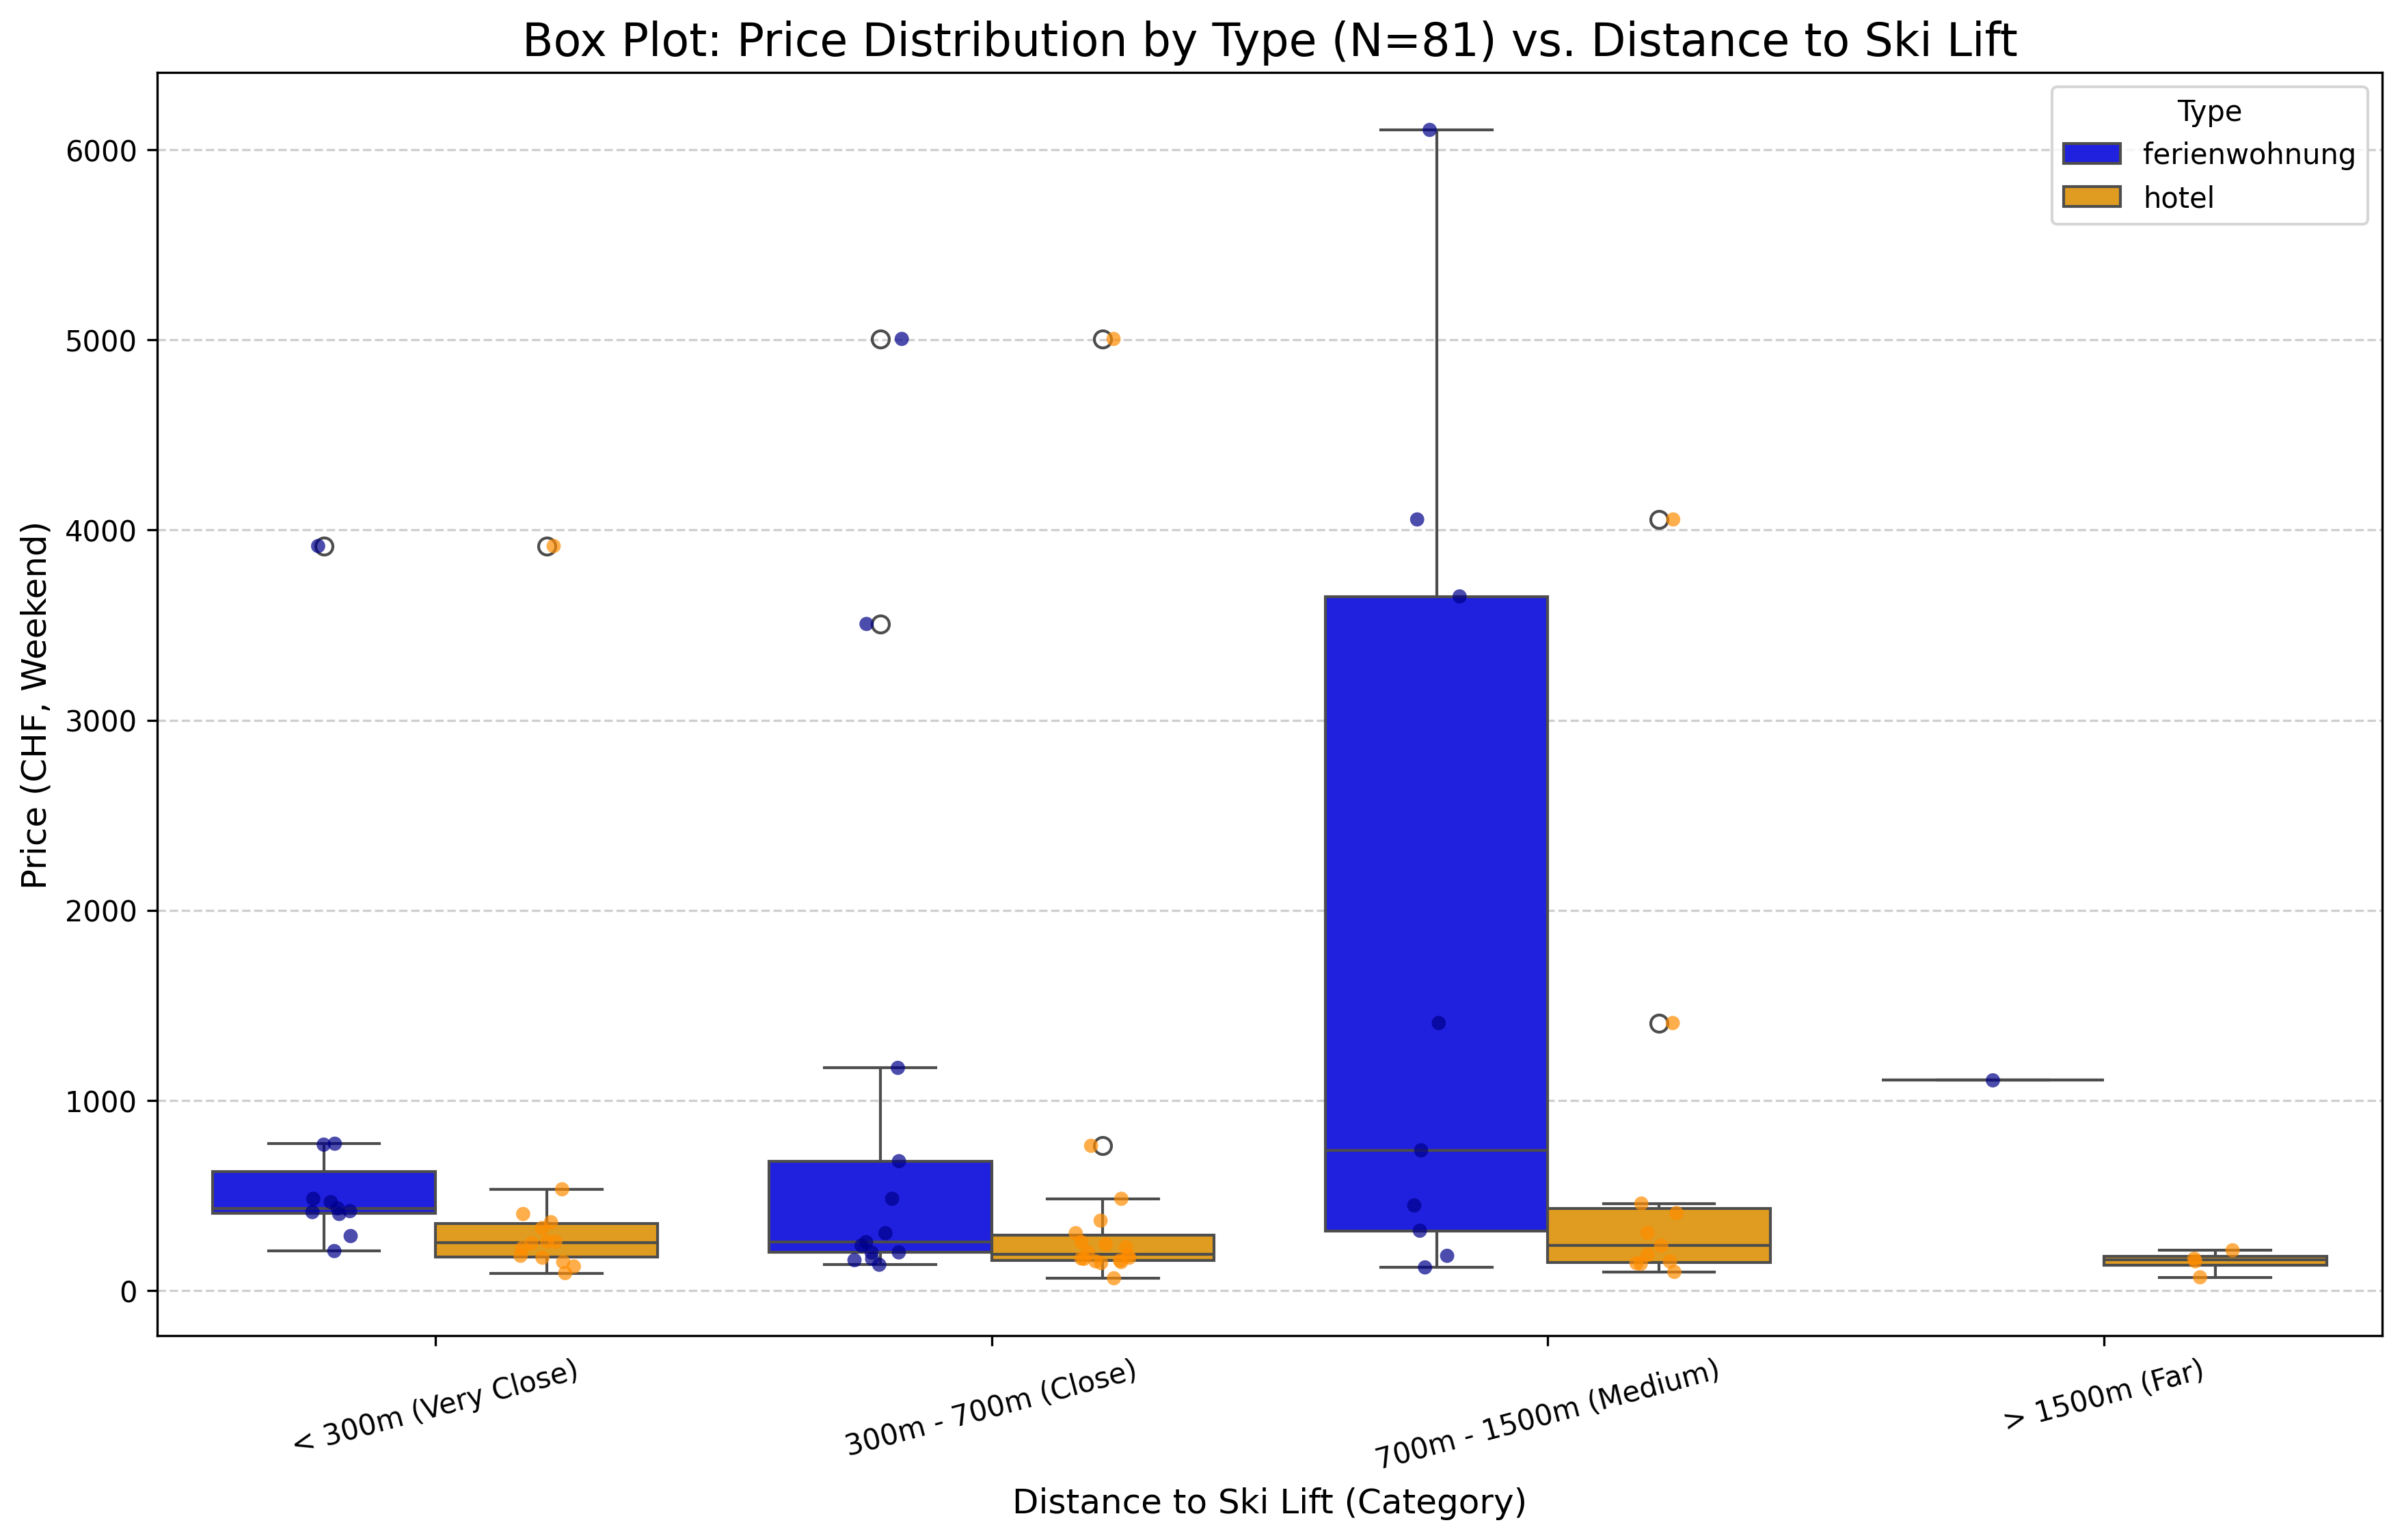

In [39]:
plt.figure(figsize=(14, 8), dpi=300)

# Define color palette for the types
type_palette = {"ferienwohnung": "blue", "hotel": "orange"}
stripplot_palette = {"ferienwohnung": "darkblue", "hotel": "darkorange"}


# Box Plot
sns.boxplot(
    data=df,
    x='distance_category',
    y='price',
    hue='type',
    order=category_order,
    palette=type_palette
)

# Add data points (Stripplot) to show actual density
sns.stripplot(
    data=df,
    x='distance_category',
    y='price',
    hue='type',
    order=category_order,
    palette=stripplot_palette,
    dodge=True,        # Ensure points align with their respective box
    jitter=0.1,        # Scatter points slightly horizontally
    size=5,
    alpha=0.7,
    legend=False       # Suppress duplicate legend entry
)

# 4. FORMAT AND DISPLAY GRAPHIC

plt.title(f"Box Plot: Price Distribution by Type (N={len(df)}) vs. Distance to Ski Lift", fontsize=16)
plt.xlabel("Distance to Ski Lift (Category)", fontsize=12)
plt.ylabel("Price (CHF, Weekend)", fontsize=12)
plt.xticks(rotation=15)
plt.legend(title='Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()